<a href="https://colab.research.google.com/github/vbaezfortunato/Python_class/blob/master/Hoja_de_trabajo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hoja de Trabajo #4

## Problema 1
Para este problema debera hacer analisis de sentimientos para un conjunto de reviews de Yelp, debera mostrar las siguientes metricas sobre el conjunto de reviews:

1. Mostrar el porcentaje de comentarios positivos y comentarios negativos en una misma grafica
2. Mostrar una grafica tipo boxplot para la distribucion de los resultados de la polaridad y lasubjetividad
3. Debera realizar un analisis estadistico con comentarios sobre los resultados de sus hallazgos a partir de las graficas anteriores.

In [1]:
import requests
import re
import pandas as pd
import html as ht
import matplotlib.pyplot as plt
import urllib.request as urllib2

In [2]:
def Reviews(url):
    initText = '<span class="lemon--span__373c0__3997G raw__373c0__3rKqk" lang="en">' 
    endText = '</span>'
    response = requests.get(url)
    reviews = []
    reviews_temp = re.findall(initText + '(.+?)' + endText, response.text)
    page = 20
    while response.status_code == 200 and len(reviews_temp) > 0:
        reviews_temp = re.findall(initText + '(.+?)' + endText, response.text)
        for i in range(len(reviews_temp)):
            reviews.append(reviews_temp[i])
        response = requests.get(url + '?start=' + str(page))
        page += 20
        print(page)
    return reviews

In [3]:

reviewspatron = Reviews("https://www.yelp.com/biz/el-patron-restaurante-mexicano-orlando")

40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300


In [4]:
def removerFormatoHTML(reviews):
    for index, review in enumerate(reviews):
        review = ht.unescape(review)
        reviews[index] = review
    return reviews

In [5]:
reviewspatron[120]

'Our family went for lunch buffet. 9.99 for adults, 6.99 for kids weekdays 11:30-2:30. Plenty of choices of meet and shells. My husband loved the queso. Steak fajitas are perfect. We used our Orlando kids eat free card with no problems. We would recommend. <br><br>3rd year coming here. Prices went up but still worth it!'

In [6]:

reviewspatron = removerFormatoHTML(reviewspatron)

In [7]:
Total = pd.DataFrame(reviewspatron,columns=['reviews'])
Total.head()

,reviews
0,We were trying to find something that we could...
1,El Patron is our favorite restaurant in the Or...
2,Ok. So a lot of the reviews here are for the a...
3,Fresh made corn and flour tortillas. Crazy goo...
4,I was traveling for work and staying in the La...


In [8]:
def cleanReviews(listReviews):
    listaReviews = listReviews.str.replace('<br>','')
    listaReviews = listReviews.str.replace('<br><br>','')
    listaReviews = listReviews.str.replace('&#39;',"'")
    listaReviews = listReviews.str.replace(u'\xa0'," ")
    listReviews = listReviews.str.lower()
    listReviews = listReviews.str.rstrip('\n')
    return listReviews

In [9]:
Total['reviews']=cleanReviews(Total['reviews'])
Total.head()

,reviews
0,we were trying to find something that we could...
1,el patron is our favorite restaurant in the or...
2,ok. so a lot of the reviews here are for the a...
3,fresh made corn and flour tortillas. crazy goo...
4,i was traveling for work and staying in the la...


In [10]:
Total['reviews'][120]

'our family went for lunch buffet. 9.99 for adults, 6.99 for kids weekdays 11:30-2:30. plenty of choices of meet and shells. my husband loved the queso. steak fajitas are perfect. we used our orlando kids eat free card with no problems. we would recommend. <br><br>3rd year coming here. prices went up but still worth it!'

## Comenzando el analisis de sentimiento

In [11]:
from textblob import TextBlob

In [44]:
def Sentimientos(allReviews, translate = False):
    polarities = []
    subjs = []
    label = []
    opinion = []

    for review in allReviews:
        sentimiento = TextBlob(review)
        if translate:
           sentimiento = sentimiento.translate(from_lang='en', to='es') 
        polarities.append(sentimiento.polarity)
        subjs.append(sentimiento.subjectivity)
        
        #Identificacion tipo de review segun polaridad
        if (sentimiento.polarity > 0):
            label.append('positivo')
        elif (sentimiento.polarity < 0):
            label.append('negativo')
        else:
            label.append('neutro')
        
        #Identificacion tipo de review segun subjetividad
        if (sentimiento.subjectivity > 0.5):
            opinion.append('subjetivo')
        elif (sentimiento.subjectivity <= 0.5):
            opinion.append('objetivo')
        
    dataOut = pd.DataFrame({'polaridad':polarities, 'subje':subjs, 'etiqueta':label, 'tipo opinion':opinion})
    dataOut.head()

    return dataOut

In [47]:
Analisis = Sentimientos(Total['reviews'])
Analisis.head()

,polaridad,subje,etiqueta,tipo opinion
0,0.322879,0.575238,positivo,subjetivo
1,0.416141,0.497222,positivo,objetivo
2,0.211522,0.521429,positivo,subjetivo
3,0.260417,0.457639,positivo,objetivo
4,0.175000,0.414153,positivo,objetivo


In [14]:
Polaridad1=Analisis.etiqueta.value_counts()
Polaridad1

positivo    1181
negativo      98
neutro         2
Name: etiqueta, dtype: int64

In [15]:

Subjetividad1=Analisis["tipo opinion"].value_counts()
Subjetividad1

subjetivo    977
objetivo     304
Name: tipo opinion, dtype: int64

In [16]:
def Pie(polaridad, titulo):
    plt.pie(polaridad.values[0:2], 
        explode=(0.1, 0),
        labels=polaridad.keys()[0:2],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)

    plt.axis('equal')
    plt.title(titulo)
    plt.show()

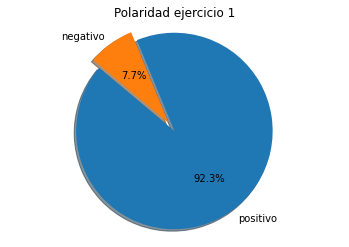

In [17]:
Pie(Polaridad1, 'Polaridad ejercicio 1')

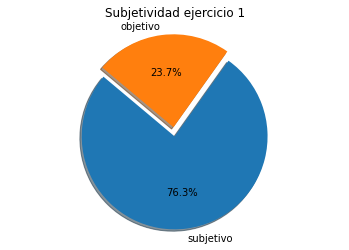

In [18]:
Pie(Subjetividad1, 'Subjetividad ejercicio 1')

{'boxes': [<matplotlib.lines.Line2D at 0x7f9c6b2c57f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c6b2c2be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c6b2bfc50>,
 'means': [<matplotlib.lines.Line2D at 0x7f9c6b2bffd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9c6b2c2438>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9c6b2c5438>,
  <matplotlib.lines.Line2D at 0x7f9c6b2bae10>]}

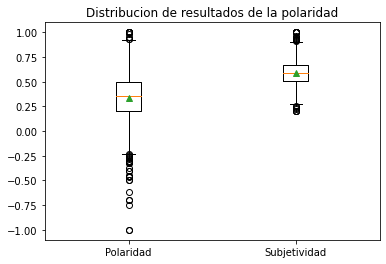

In [19]:
fig1, ax1 = plt.subplots()
ax1.set_title('Distribucion de resultados de la polaridad')
ax1.boxplot([Analisis['polaridad'], Analisis['subje']], labels = ['Polaridad','Subjetividad'],showmeans=True)

**Conclusion:**

El Patron Restaurante Mexicano tiene un procentaje abrumador de comentarios positivos, 92.2%. Sin embargo practicamente un 76% de estos comentarios fueron subjetivos. 


## Problem 2

Cree un web scraper para los reviews del sitio Trip Advisor, similar al demo trabajado durante la clase #8. Desarrolle un programa que le permita aplicar el analisis de sentimientos desarrollado por su persona en el ejercicio anterior, debera analizar el codigo HTML para poder realizar exitosamente el web scraper.

Para el caso de Trip Advisor, podra notar que la URL se modifica por medio de un parametro llamado or-X donde X es el indice inicial de cada review. En Trip Advisor, los reviews estan organizados en multiplos de 5. A continuacion se le muestra una URL y el parametro de configuracion mencionado:

https://www.tripadvisor.com/Hotel_Review-g34515-d1197260-Reviews-Holiday_Inn_Express_Hotel_Suites_Orlando_International_Drive-Orlando_Florida.html

In [48]:
def Reviews_TripAdvisor(url1, url2):
    initText = '<q class="IRsGHoPm"><span>' 
    endText = '</span></q>'
    response = requests.get(url1+url2)
    reviews = []
    reviews_temp = re.findall(initText + '(.+?)' + endText, response.text)
    page = 5
    while response.status_code == 200 and len(reviews_temp) > 0:
        reviews_temp = re.findall(initText + '(.+?)' + endText, response.text)
        for i in range(len(reviews_temp)):
            reviews.append(reviews_temp[i])
        response = requests.get(url1 + '-or' + str(page) + url2)
        page += 5
        print(page)
    return reviews

In [51]:
urlPart1="https://www.tripadvisor.com/Hotel_Review-g34515-d1197260-Reviews"
urlPart2="-Holiday_Inn_Express_Hotel_Suites_Orlando_International_Drive-Orlando_Florida.html"

In [52]:
reviewsHotel = Reviews_TripAdvisor(urlPart1,urlPart2)

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695


In [55]:
reviewsHotel = removerFormatoHTML(reviewsHotel)

In [56]:
Total2 = pd.DataFrame(reviewsHotel,columns=['reviews'])
Total2.head()

,reviews
0,The continental breakfast was inconsistent. Co...
1,Loud neighbors with no recourse. Breakfast la...
2,No breakfast buffet. Offering is a bag contain...
3,This was our first time staying here and it wa...
4,We have been here before and for our surprise ...


In [57]:
Total2['reviews']=cleanReviews(Total2['reviews'])
Total2.head()

,reviews
0,the continental breakfast was inconsistent. co...
1,loud neighbors with no recourse. breakfast la...
2,no breakfast buffet. offering is a bag contain...
3,this was our first time staying here and it wa...
4,we have been here before and for our surprise ...


In [58]:
AnalisisHotel = Sentimientos(Total2['reviews'])
AnalisisHotel.head()

,polaridad,subje,etiqueta,tipo opinion
0,0.187363,0.456593,positivo,objetivo
1,-0.145833,0.508333,negativo,subjetivo
2,-0.208929,0.314286,negativo,objetivo
3,0.266000,0.547333,positivo,subjetivo
4,0.172083,0.556667,positivo,subjetivo


In [59]:
Polaridad2=AnalisisHotel.etiqueta.value_counts()
Polaridad2

positivo    649
negativo     34
neutro        1
Name: etiqueta, dtype: int64

In [61]:
Subjetividad2=AnalisisHotel["tipo opinion"].value_counts()
Subjetividad2

subjetivo    435
objetivo     249
Name: tipo opinion, dtype: int64

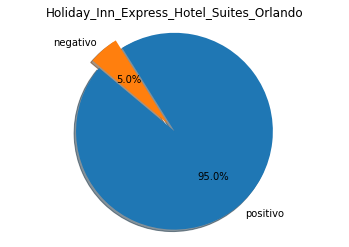

In [63]:
Pie(Polaridad2, 'Holiday_Inn_Express_Hotel_Suites_Orlando')

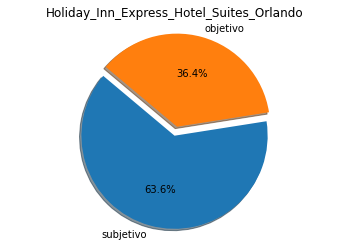

In [64]:
Pie(Subjetividad2, 'Holiday_Inn_Express_Hotel_Suites_Orlando')

{'boxes': [<matplotlib.lines.Line2D at 0x7f9c63048b38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c63056588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c6305e390>,
 'means': [<matplotlib.lines.Line2D at 0x7f9c6305e048>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9c63056c88>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9c63048e48>,
  <matplotlib.lines.Line2D at 0x7f9c6305ee48>]}

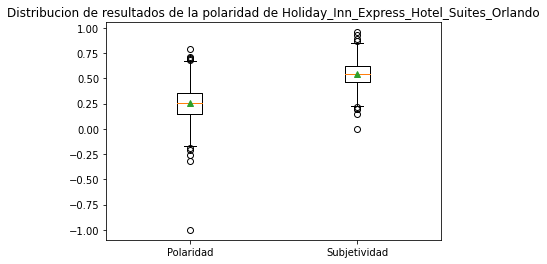

In [65]:
fig1, ax1 = plt.subplots()
ax1.set_title('Distribucion de resultados de la polaridad de Holiday_Inn_Express_Hotel_Suites_Orlando')
ax1.boxplot([AnalisisHotel['polaridad'], AnalisisHotel['subje']], labels = ['Polaridad','Subjetividad'],showmeans=True)

**Conclusion:**

Segun el resultado de la polaridad  95% del Holiday Inn Express Hotel Suites Orlando demuestra que la popularidad del hotel es mas alta de lo que piensas las personas que viven en Orlando Downtown, lo cuales puede significar que el hotel ha mejorado su servicio.